# Chapter 2

### Exercise 2.1: 
$0.5(1+\frac{1}{|A|})$

### Exercise 2.3
In the long run $\epsilon=0.01$ will have the highest cumulative reward, this is because $\epsilon=0.01$ will choose the best reward $r_{max}$ 99% times and the mean reward 1% times. On the other hand, $\epsilon=0.1$ will select $r_{max}$ 90% times.

Cumulative reward for for $\epsilon=0.01$: $0.01 * r_{max} + 0.99 * r{avg}$

Cumulative reward for for $\epsilon=0.1$: $0.1 * r_{max} + 0.9 * r{avg}$

### Exercise 2.4
Solving and subtituting $\alpha_{n}$ we get:

$\prod_{1}^{n} (1-\alpha_{i})Q_1 + \sum_{1}^{n} ( R_i \alpha_i \prod_{i}^{n-1} (1-\alpha_j) )$

### Implementation of provided graph

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
k=10
q_star=np.random.normal(0,1,size=k)

In [30]:
q_star

array([-0.80701394,  0.19077334, -0.17951037,  0.88322713,  2.3162854 ,
       -2.08123127, -0.40297612,  0.94019762,  0.40816453, -0.45699937])

In [41]:
def run_time_steps(q_star,n_steps,evaluations,epsilon,k=10):
    avg_rewards=[]
    for eval in range(evaluations):
        q_star=np.random.normal(0,1,size=k)
        rewards=[]
        action_values=[0]*len(q_star)
        n_used=[0]*len(q_star)
        for i in range(0,n_steps):
            R_t=np.random.normal(q_star,0.1,size=len(q_star))
            if np.random.rand()<epsilon:
                #Explorative
                act_exp_id=np.random.randint(0,len(q_star))
                rewards.append(action_values[act_exp_id])
                R_t=np.random.normal(q_star[act_exp_id],1,size=1)
                #Update action value
                action_values[act_exp_id]=(action_values[act_exp_id]*n_used[act_exp_id]+R_t)/(n_used[act_exp_id]+1)
                n_used[act_exp_id]+=1
            else:
                #Greedy
                act_max_id=np.argmax(action_values)
                rewards.append(action_values[act_max_id])
                R_t=np.random.normal(q_star[act_max_id],1,size=1)
                #Update action value
                action_values[act_max_id]=(action_values[act_max_id]*n_used[act_max_id]+R_t)/(n_used[act_max_id]+1)
                n_used[act_max_id]+=1
        avg_rewards.append(rewards)
    avg_rewards=np.stack(avg_rewards,axis=-1).mean(-1)
    return avg_rewards

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequence

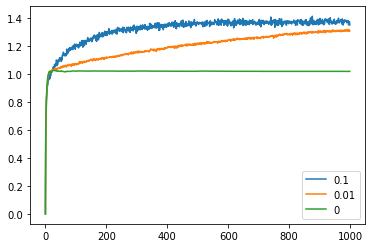

In [43]:
eps0_1_reward=run_time_steps(q_star,1000,2000,0.1,)
plt.plot(range(0,len(eps0_1_reward)),eps0_1_reward,label='0.1')
eps0_1_reward=run_time_steps(q_star,1000,2000,0.01)
plt.plot(range(0,len(eps0_1_reward)),eps0_1_reward,label='0.01')
eps0_1_reward=run_time_steps(q_star,1000,2000,0)
plt.plot(range(0,len(eps0_1_reward)),eps0_1_reward,label='0')
plt.legend()
plt.show()

### Exercise 2.5

In [47]:
np.random.normal(0,1,size=1).repeat(10)

array([-0.29041084, -0.29041084, -0.29041084, -0.29041084, -0.29041084,
       -0.29041084, -0.29041084, -0.29041084, -0.29041084, -0.29041084])

In [67]:
def run_time_steps_ex25_sampleavg(n_steps,evaluations,epsilon,k=10):
    avg_rewards=[]
    optimal_count=[0]*n_steps
    for eval in range(evaluations):
        q_star=np.random.normal(0,1,size=1).repeat(k) #Single q_star
        rewards=[]
        action_values=[0]*len(q_star)
        n_used=[0]*len(q_star)
        for i in range(0,n_steps):
            q_star+=np.random.normal(0,0.01,size=len(q_star))
            if np.random.rand()<epsilon:
                #Explorative
                act_exp_id=np.random.randint(0,len(q_star))
                rewards.append(action_values[act_exp_id])
                R_t=np.random.normal(q_star[act_exp_id],1,size=1)
                #Update action value
                action_values[act_exp_id]=(action_values[act_exp_id]*n_used[act_exp_id]+R_t)/(n_used[act_exp_id]+1)
                n_used[act_exp_id]+=1
                #Update optimal action
                if np.argmax(q_star)==act_exp_id:
                    optimal_count[i]+=1
            else:
                #Greedy
                act_max_id=np.argmax(action_values)
                rewards.append(action_values[act_max_id])
                R_t=np.random.normal(q_star[act_max_id],1,size=1)
                #Update action value
                action_values[act_max_id]=(action_values[act_max_id]*n_used[act_max_id]+R_t)/(n_used[act_max_id]+1)
                n_used[act_max_id]+=1
                if np.argmax(q_star)==act_max_id:
                    optimal_count[i]+=1 
        avg_rewards.append(rewards)
    avg_rewards=np.stack(avg_rewards,axis=-1).mean(-1)
    optimal_count=np.array(optimal_count)/evaluations
    return avg_rewards,optimal_count

In [68]:
def run_time_steps_ex25_alpha(n_steps,evaluations,epsilon,alpha,k=10):
    avg_rewards=[]
    optimal_count=[0]*n_steps
    for eval in range(evaluations):
        q_star=np.random.normal(0,1,size=1).repeat(k) #Single q_star
        rewards=[]
        action_values=[0]*len(q_star)
        n_used=[0]*len(q_star)
        for i in range(0,n_steps):
            q_star+=np.random.normal(0,0.01,size=len(q_star))
            if np.random.rand()<epsilon:
                #Explorative
                act_exp_id=np.random.randint(0,len(q_star))
                rewards.append(action_values[act_exp_id])
                R_t=np.random.normal(q_star[act_exp_id],1,size=1)
                #Update action value
                action_values[act_exp_id]=action_values[act_exp_id]+alpha*(R_t-action_values[act_exp_id])
                n_used[act_exp_id]+=1
                #Update optimal action
                if np.argmax(q_star)==act_exp_id:
                    optimal_count[i]+=1
            else:
                #Greedy
                act_max_id=np.argmax(action_values)
                rewards.append(action_values[act_max_id])
                R_t=np.random.normal(q_star[act_max_id],1,size=1)
                #Update action value
                action_values[act_max_id]=action_values[act_max_id]+alpha*(R_t-action_values[act_max_id])
                n_used[act_max_id]+=1
                if np.argmax(q_star)==act_max_id:
                    optimal_count[i]+=1 
        avg_rewards.append(rewards)
    avg_rewards=np.stack(avg_rewards,axis=-1).mean(-1)
    optimal_count=np.array(optimal_count)/evaluations
    return avg_rewards,optimal_count

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


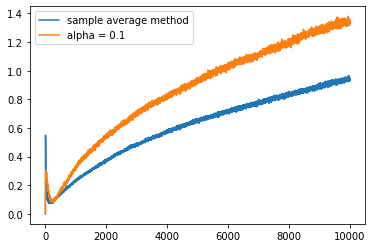

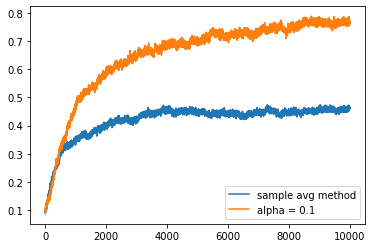

In [70]:
sample_avg_rewards,sample_avg_optimal_count=run_time_steps_ex25_sampleavg(10000,2000,0.1,)
alpha_rewards,alpha_optimal_count=run_time_steps_ex25_alpha(10000,2000,0.1,0.1)

plt.plot(range(0,len(sample_avg_rewards)),sample_avg_rewards,label='sample average method')

plt.plot(range(0,len(alpha_rewards)),alpha_rewards,label='alpha = 0.1')
plt.legend()
plt.show()

plt.plot(range(0,len(sample_avg_optimal_count)),sample_avg_optimal_count,label='sample avg method')
plt.plot(range(0,len(alpha_optimal_count)),alpha_optimal_count,label='alpha = 0.1')
plt.legend()
plt.show()